In [42]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [43]:
train=tf.keras.preprocessing.image_dataset_from_directory("all_birds", labels="inferred", label_mode="categorical", subset="training", seed=133, validation_split=0.2, image_size=(256,256))

Found 500 files belonging to 10 classes.
Using 400 files for training.


In [44]:
test=tf.keras.preprocessing.image_dataset_from_directory("val_ten_uk_birds/", labels="inferred", label_mode="categorical")

Found 100 files belonging to 10 classes.


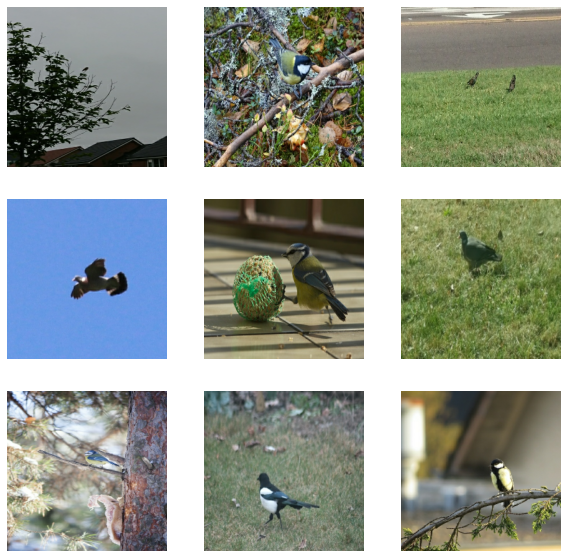

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, _ in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        #plt.title(int(labels[i]))
        plt.axis("off")

In [46]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
    ]
)

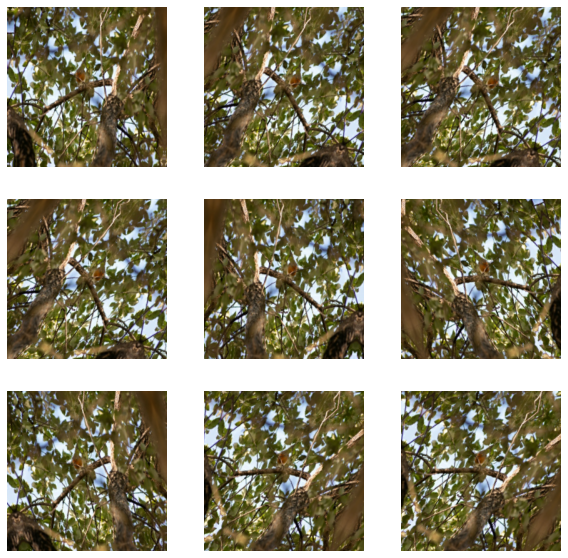

In [47]:
plt.figure(figsize=(10, 10))
for images, _ in train.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [48]:
inputs = keras.Input(shape=(256,256,3))
x = data_augmentation(inputs)
x = keras.layers.Rescaling(1./255)(x)

In [49]:
image_size=(256,256)

In [54]:
def leNet_5_max_pool():
    model = keras.Sequential()
    
    

    model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), strides=1, padding="valid", activation='relu', input_shape=(256,256,3)))
    model.add(layers.MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

    model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), strides=1, padding="valid", activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

    model.add(layers.Flatten())
    
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(units=120, activation='relu'))

    model.add(layers.Dense(units=84, activation='relu'))

    model.add(layers.Dense(units=10, activation = 'softmax'))
    return model

In [55]:
m=leNet_5_max_pool()

m.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy', tf.keras.metrics.Recall()])

In [56]:
m.fit(train,epochs=10, verbose=1)

Epoch 1/10
13/13 [==============================] - 10s 718ms/step - loss: 250.4513 - accuracy: 0.0975 - recall_3: 0.0900
Epoch 2/10
13/13 [==============================] - 10s 743ms/step - loss: 3.4281 - accuracy: 0.1775 - recall_3: 0.0575
Epoch 3/10
13/13 [==============================] - 10s 750ms/step - loss: 2.0187 - accuracy: 0.3400 - recall_3: 0.1225
Epoch 4/10
13/13 [==============================] - 11s 824ms/step - loss: 1.4304 - accuracy: 0.5500 - recall_3: 0.3075
Epoch 5/10
13/13 [==============================] - 11s 857ms/step - loss: 1.0832 - accuracy: 0.7025 - recall_3: 0.5050
Epoch 6/10
13/13 [==============================] - 11s 849ms/step - loss: 0.8141 - accuracy: 0.8275 - recall_3: 0.6200
Epoch 7/10
13/13 [==============================] - 10s 766ms/step - loss: 0.5069 - accuracy: 0.8750 - recall_3: 0.7550
Epoch 8/10
13/13 [==============================] - 11s 846ms/step - loss: 0.4119 - accuracy: 0.9200 - recall_3: 0.7875
Epoch 9/10
13/13 [====================

In [53]:
m.evaluate(test)

4/4 [==============================] - 1s 144ms/step - loss: 2.2880 - accuracy: 0.1300 - recall_2: 0.0000e+00


[2.2879815101623535, 0.12999999523162842, 0.0]